#  Customer Retail Purchase Analysis & Prediction (2023)

##  Problem Statement
Using the *Customer Retail Purchase Data (2023)*, we aim to build a **Linear Regression model** that predicts the **Total Amount Spent** by a customer during a transaction. The model will use customer demographics and purchase behavior to make predictions.

---

## Objective
- Predict the `Total Amount` using various features such as:
  - Gender
  - Age
  - Product Category
  - Quantity
  - Price per Unit

---

##  Dataset Description

| Column Name       | Description                                                        |
|-------------------|--------------------------------------------------------------------|
| `Date`            | Date of the transaction                                            |
| `Gender`          | Gender of the customer                                             |
| `Age`             | Age of the customer                                                |
| `Product Category`| Category of the purchased item (e.g., Beauty, Clothing, Electronics)|
| `Quantity`        | Number of units purchased                                          |
| `Price per Unit`  | Cost of one unit of the item                                       |
| `Total Amount`    | Total spending = Quantity × Price per Unit                         |

---

##  Features and Label

- **Features (X)**:
  - `Gender` (encoded: Male = 0, Female = 1)
  - `Age`
  - `Product Category` (encoded: Beauty = 0, Clothing = 1, Electronics = 2)
  - `Quantity`
  - `Price per Unit`

- **Label (y)**:
  - `Total Amount`

---

##  Step 1: Data Cleaning & Preprocessing

-  Check for **null/missing values**
-  Check for **duplicate entries**
-  Detect and handle **outliers**

---

##  Step 2: Exploratory Data Analysis (EDA)

### Distribution Plots
- Age distribution
- Price per Unit distribution
- Quantity and Total Amount distribution

###  Gender-wise Analysis
- Total Amount by Gender
- Average Quantity purchased by Gender

###  Category Trends
- Most popular Product Categories
- Monthly or seasonal trends (extract from Date)

---

##  Step 3: Feature Scaling

- Apply `StandardScaler` to scale numerical features:
  - Age
  - Quantity
  - Price per Unit

---

##  Step 4: Train-Test Split

- Split data into:
  - Training set (e.g., 80%)
  - Testing set (e.g., 20%)
- Use `train_test_split` with `random_state=42`

---

##  Step 5: Linear Regression Model

- Fit the **Linear Regression** model on training data
- Predict on test set

---

##  Step 6: Model Evaluation

Calculate and compare the following metrics:
- 🔹 `R² Score`
- 🔹 `Mean Absolute Error (MAE)`
- 🔹 `Mean Squared Error (MSE)`
- 🔹 `Root Mean Squared Error (RMSE)`

---

##  Step 7: Regularization for Overfitting Check

###  Lasso Regression
- Use L1 regularization
- Evaluate performance and feature selection

###  Ridge Regression
- Use L2 regularization
- Compare training/testing performance

---

##  Step 8: Model Comparison

| Model Type       | Train R² | Test R² | MAE  | MSE  | RMSE |
|------------------|----------|---------|------|------|------|
| Linear Regression|          |         |      |      |      |
| Lasso Regression |          |         |      |      |      |
| Ridge Regression |          |         |      |      |      |

- Comment on whether the model is overfitting or underfitting based on results

---

## Conclusion

- Summary of insights from the data
- Final selected model and performance
- Suggestions for improvement or future work (e.g., more features, advanced models like XGBoost, time series forecasting)


In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("C:/Users/cmgou/Documents/Meta scifor/Test 8.0/Test 8.0/Regression Problem/sales.csv")

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,0,2023-11-24,0,34,0,3,50,150
1,1,1,2023-02-27,1,26,1,2,500,1000
2,2,2,2023-01-13,0,50,2,1,30,30
3,3,3,2023-05-21,0,37,1,1,500,500
4,4,4,2023-05-06,0,30,0,2,50,100


In [6]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,995,995,2023-05-16,0,62,1,1,50,50
996,996,996,2023-11-17,0,52,0,3,30,90
997,997,997,2023-10-29,1,23,0,4,25,100
998,998,998,2023-12-05,1,36,2,3,50,150
999,999,999,2023-04-12,0,47,2,4,30,120


In [7]:
df.shape

(1000, 9)

In [9]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,0.51000,41.39200,1.035000,2.514000,179.890000,456.000000
std,288.819436,288.819436,0.50015,13.68143,0.805247,1.132734,189.681356,559.997632
min,0.000000,0.000000,0.00000,18.00000,0.000000,1.000000,25.000000,25.000000
25%,249.750000,249.750000,0.00000,29.00000,0.000000,1.000000,30.000000,60.000000
50%,499.500000,499.500000,1.00000,42.00000,1.000000,3.000000,50.000000,135.000000
75%,749.250000,749.250000,1.00000,53.00000,2.000000,4.000000,300.000000,900.000000
max,999.000000,999.000000,1.00000,64.00000,2.000000,4.000000,500.000000,2000.000000


In [11]:
df.isna().sum() #no null values founded

Unnamed: 0.1        0
Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
del df['Unnamed: 0.1']
del df['Unnamed: 0']
del df['Date']

In [15]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,34,0,3,50,150
1,1,26,1,2,500,1000
2,0,50,2,1,30,30
3,0,37,1,1,500,500
4,0,30,0,2,50,100


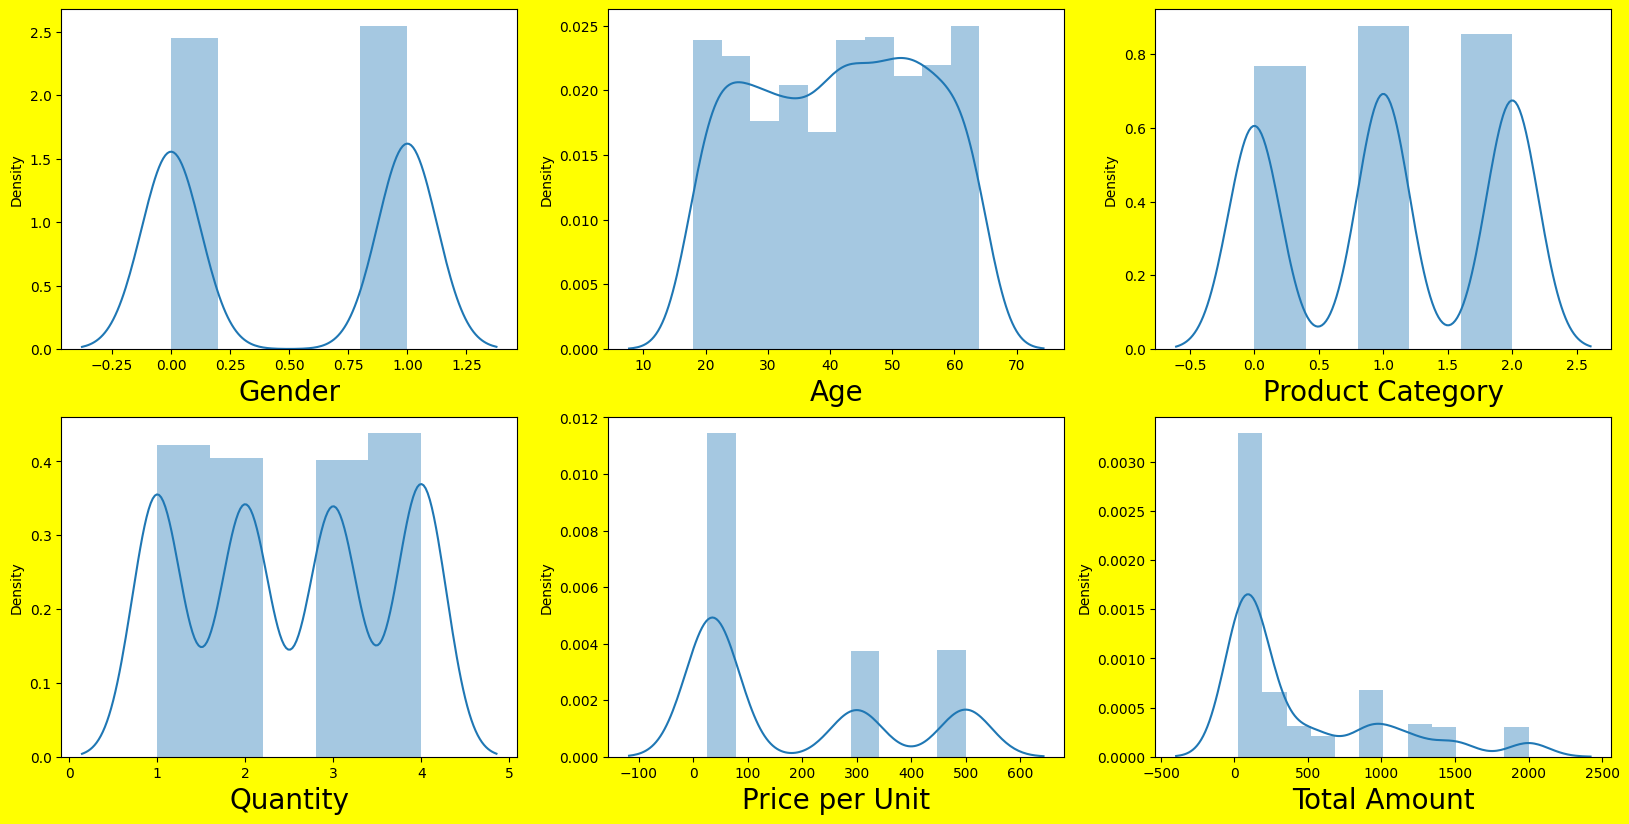

In [16]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [18]:
df['Age'] = df['Age'].replace(0, df['Age'].mean())
df['Product Category'] = df['Product Category'].replace(0, df['Product Category'].mean())
df['Quantity'] = df['Quantity'].replace(0, df['Quantity'].mean())
df['Price per Unit'] = df['Price per Unit'].replace(0, df['Price per Unit'].mean())
df['Total Amount'] = df['Total Amount'].replace(0, df['Total Amount'].mean())


In [19]:
x=df.drop(columns=['Total Amount'])
y=df['Total Amount']


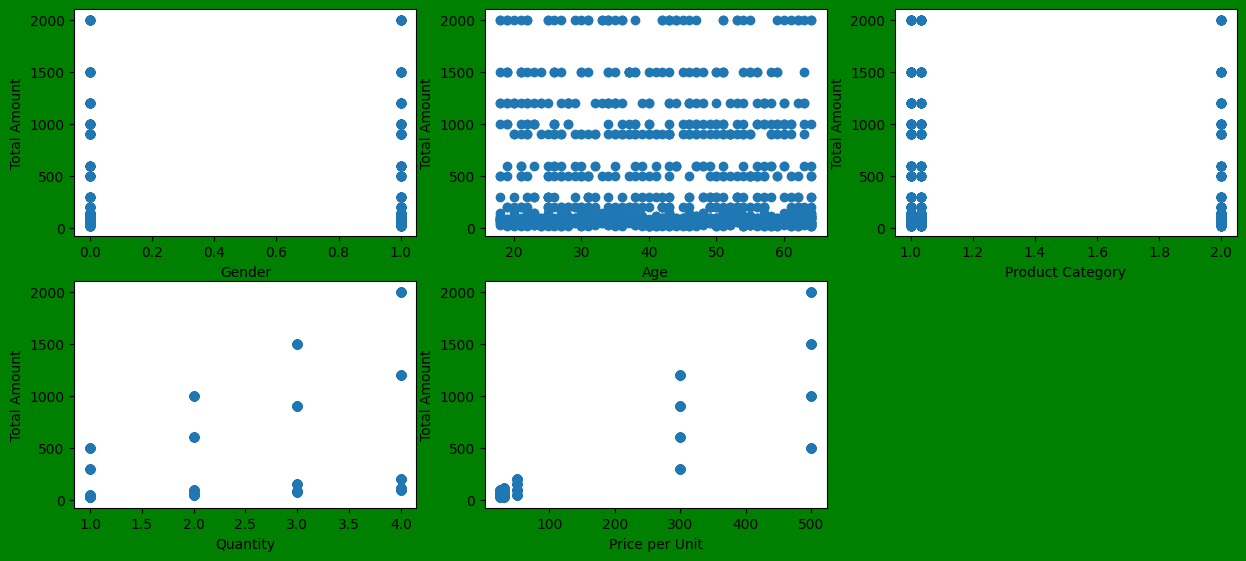

In [20]:
plt.figure(figsize=(15,10),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber <=6:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Total Amount',fontsize=10)
    plotnumber +=1
plt.show()

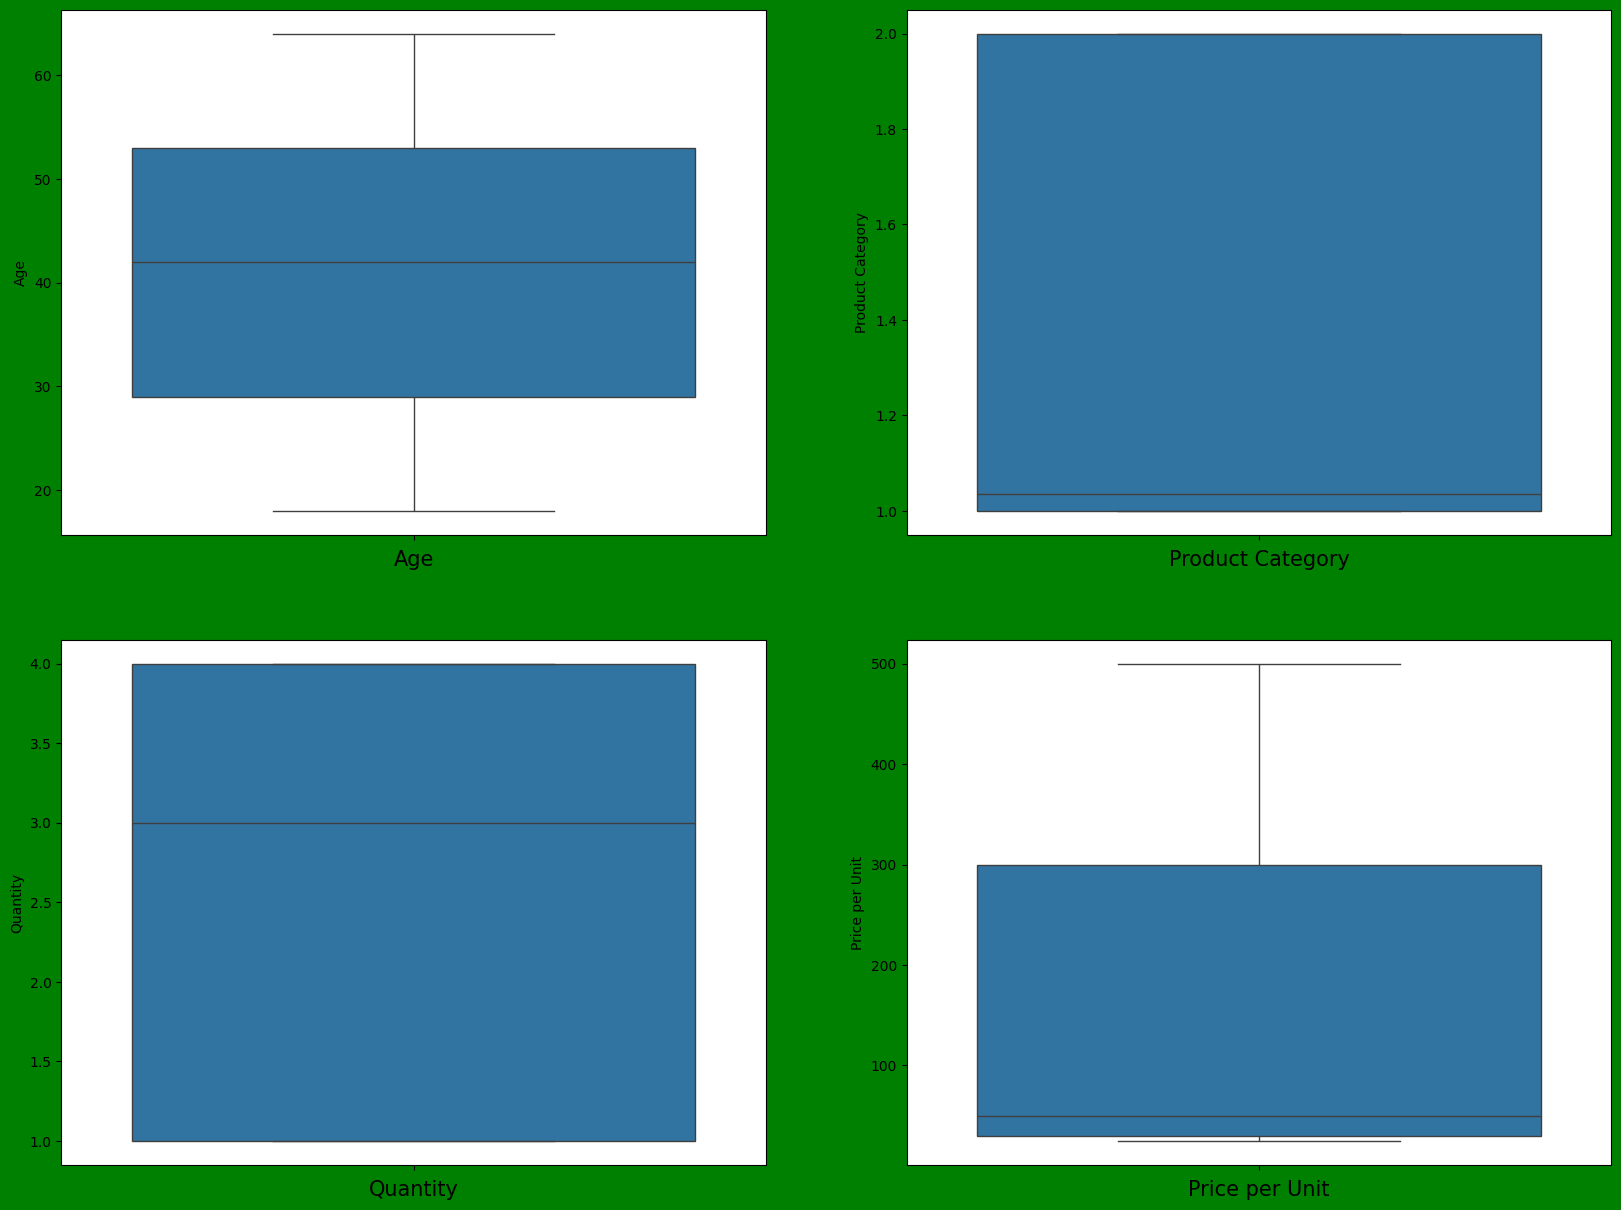

In [21]:
df_feature=df.drop(['Total Amount', 'Gender'], axis=1)
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in df_feature:
    if plotnumber <=4:
        plt.subplot(2,2 ,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

In [22]:
df_feature=df.drop(['Product Category', 'Gender',], axis=1)

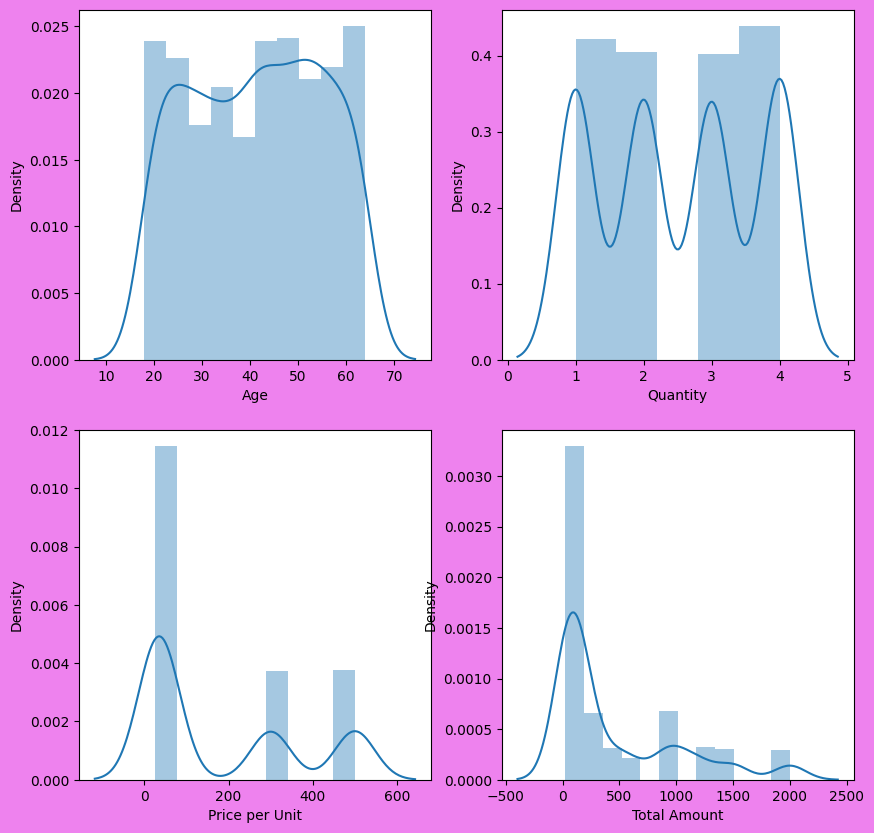

In [24]:
plt.figure(figsize=(10,10),facecolor='violet')
graph=1
for column in df_feature:
    if graph <=4:
        ax=plt.subplot(2,2,graph)
        sns.distplot(df_feature[column])
        plt.xlabel(column)
    graph +=1
plt.show()

In [25]:
x=df.drop(columns=['Product Category', 'Age', 'Price per Unit', 'Gender'])
y=df['Gender']

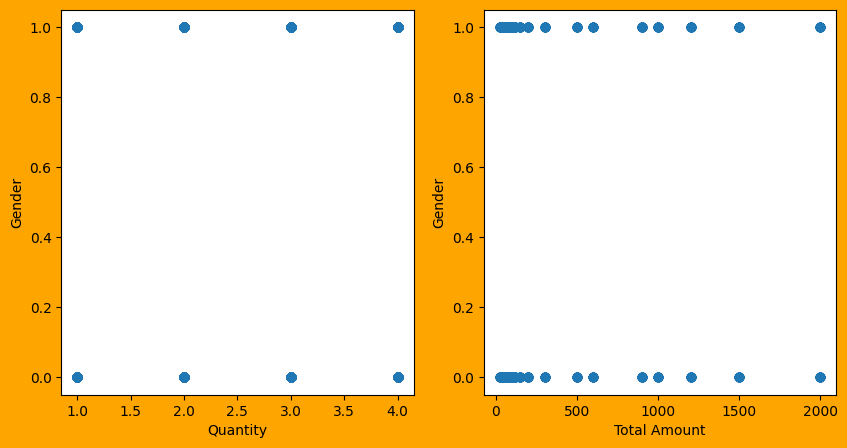

In [26]:
plt.figure(figsize=(10,5),facecolor='orange')
plotnumber=1
for column in x:
    if plotnumber <=4:
        ax=plt.subplot(1,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Gender',fontsize=10)
    plotnumber +=1
plt.show()

In [27]:
x=df.drop(columns=['Product Category'])
y=df['Product Category']

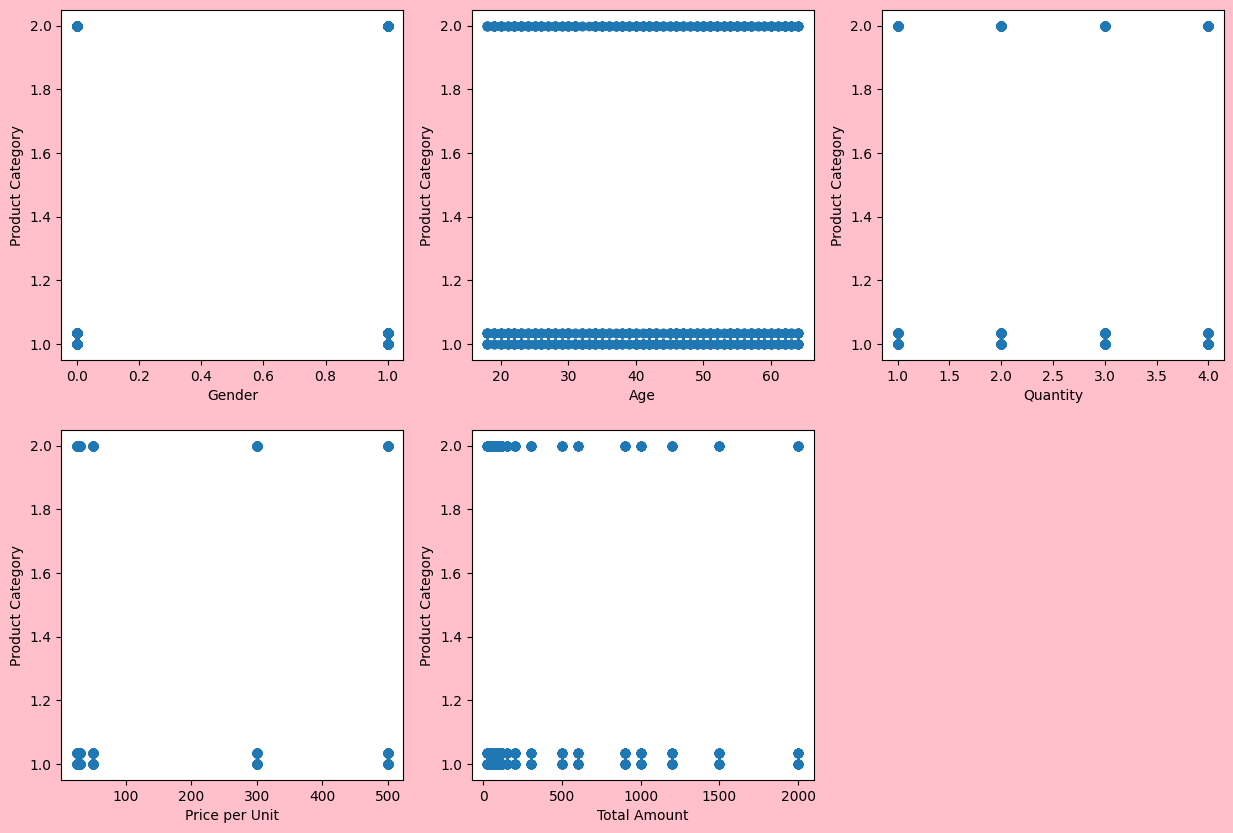

In [29]:
plt.figure(figsize=(15,10),facecolor='pink')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Product Category',fontsize=10)
    plotnumber +=1
plt.show()

In [32]:
y=df['Total Amount']
x=df[['Age', 'Quantity', 'Price per Unit']]

In [33]:
x

,Age,Quantity,Price per Unit
0,34,3,50
1,26,2,500
2,50,1,30
3,37,1,500
4,30,2,50
...,...,...,...
995,62,1,50
996,52,3,30
997,23,4,25
998,36,3,50


In [34]:
y

0       150
1      1000
2        30
3       500
4       100
       ... 
995      50
996      90
997     100
998     150
999     120
Name: Total Amount, Length: 1000, dtype: int64

In [35]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.54056476,  0.42926498, -0.68512265],
       [-1.12559156, -0.45399629,  1.68846418],
       [ 0.62948884, -1.33725757, -0.7906154 ],
       ...,
       [-1.34497661,  1.31252625, -0.81698859],
       [-0.39430806,  0.42926498, -0.68512265],
       [ 0.41010379,  1.31252625, -0.7906154 ]])

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=42)
y_train.head()

29     900
535    120
695    200
557     25
836     90
Name: Total Amount, dtype: int64

In [37]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [38]:
#Predict on test set
y_pred =(regression.predict(x_test))
y_pred


array([ 1.33995911e+03,  4.60817052e+01,  4.81772051e+02,  3.40327460e+02,
        1.54393118e+03,  1.96710650e+02, -1.47943935e+02,  5.08898673e+02,
        3.85305066e+02,  1.16040100e+03,  1.83374870e+02,  4.06563809e+01,
        6.65851263e+02, -1.88627967e+02,  4.83580493e+02,  1.44398798e+01,
        1.53488897e+03,  9.91877619e+00, -7.04342344e-01,  1.03853079e+03,
        8.48122034e+02,  3.52082329e+02,  1.35985196e+03,  8.76568911e-01,
        1.34357599e+03, -2.07389073e+02, -2.15014191e+01,  8.57164241e+02,
        3.96155715e+02,  1.79757987e+02, -1.96538424e+02, -1.80489981e+02,
        1.56248248e+02,  3.25859928e+02, -1.76645568e+02,  1.34086333e+03,
        3.29476811e+02, -1.80262451e+02, -1.45231273e+02,  2.35586242e+02,
        3.38519018e+02,  1.15587990e+03,  1.33182112e+03,  3.91634611e+02,
        4.25090778e+02,  3.46657005e+02,  5.02569128e+02,  5.07090232e+02,
        6.46862628e+02,  6.62234380e+02, -1.33476403e+02,  1.18210230e+03,
        3.63609668e+02, -

In [39]:
regression.score(x_train,y_train)

0.8543380040148312

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=regression.predict(x_test)

In [41]:
mean_absolute_error(y_test,y_pred)

173.11610215441956

In [42]:
mean_squared_error(y_test,y_pred)

41896.21322134361

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

204.6856448834251

In [44]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [45]:
alpha=lasscv.alpha_
alpha

0.480725012897826

In [46]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.480725012897826)

In [47]:
lasso_reg.score(x_test,y_test)

0.8569207440975642

In [48]:
# Ridge

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [49]:
ridgecv.alpha_

0.09099999999999998

In [50]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [51]:
ridge_model.score(x_test,y_test)

0.856876576539125

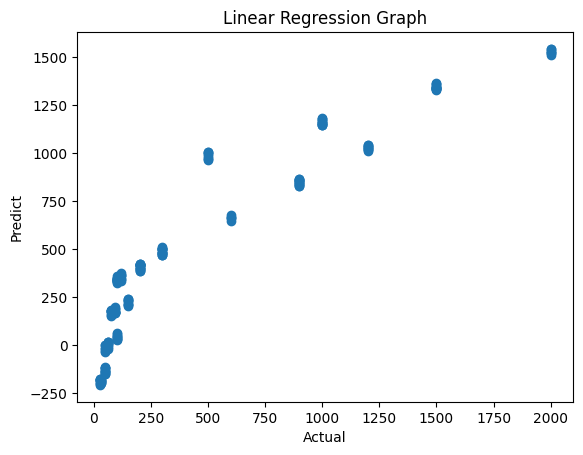

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Linear Regression Graph')
plt.show()


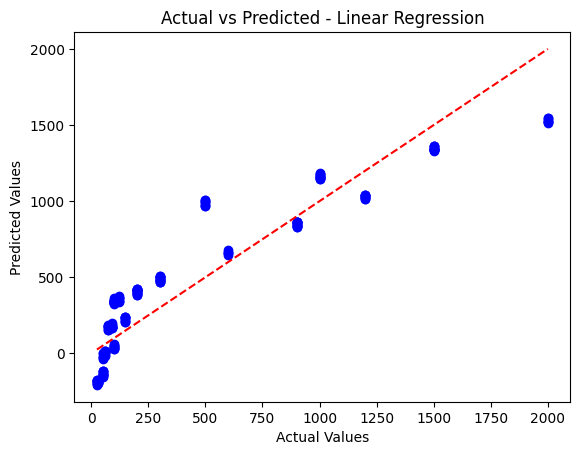

In [55]:

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # reference line
plt.show()
